In [4]:
import os
os.environ['KAGGLE_USERNAME'] = "**********" # username from the json file
os.environ['KAGGLE_KEY'] = "*************"

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 31.3MB/s]
100% 2.29G/2.29G [00:30<00:00, 80.9MB/s]


In [ ]:
!unzip chest-xray-pneumonia

In [7]:
mainDIR = os.listdir('/content/chest_xray/chest_xray')
print(mainDIR)

['val', 'train', '.DS_Store', 'test']


In [8]:

base_dir ='/content/chest_xray/chest_xray'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'val')

train_normal_dir = os.path.join(train_dir,'NORMAL')
train_pneumonia_dir = os.path.join(train_dir,'PNEUMONIA')


test_normal_dir = os.path.join(test_dir,'NORMAL')
test_pneumonia_dir = os.path.join(test_dir,'PNEUMONIA')

valid_normal_dir = os.path.join(validation_dir,'NORMAL')
valid_pneumonia_dir = os.path.join(validation_dir,'PNEUMONIA')

In [9]:
normal_fnames = os.listdir(train_normal_dir)
print(normal_fnames[:10])
pneumonia_fnames = os.listdir(train_pneumonia_dir)
print(pneumonia_fnames[:10])


['NORMAL2-IM-0974-0001.jpeg', 'NORMAL2-IM-0592-0001.jpeg', 'NORMAL2-IM-0824-0001.jpeg', 'IM-0115-0001.jpeg', 'IM-0293-0001.jpeg', 'NORMAL2-IM-1033-0001.jpeg', 'IM-0593-0001.jpeg', 'IM-0205-0001.jpeg', 'NORMAL2-IM-0497-0001.jpeg', 'NORMAL2-IM-1058-0001.jpeg']
['person520_bacteria_2204.jpeg', 'person589_bacteria_2425.jpeg', 'person690_bacteria_2587.jpeg', 'person290_virus_594.jpeg', 'person454_bacteria_1945.jpeg', 'person753_virus_1378.jpeg', 'person515_bacteria_2185.jpeg', 'person461_bacteria_1960.jpeg', 'person736_virus_1358.jpeg', 'person555_bacteria_2325.jpeg']


In [10]:
print("train normal:",len(normal_fnames))
print("train pneumonia:",len(pneumonia_fnames))
print("test normal:",len(os.listdir(test_normal_dir)))
print("test pneumonia:",len(os.listdir(test_pneumonia_dir)))
print("valid normal:",len(os.listdir(valid_normal_dir)))
print("valid pneumonia:",len(os.listdir(valid_pneumonia_dir)))

train normal: 1342
train pneumonia: 3876
test normal: 234
test pneumonia: 390
valid normal: 9
valid pneumonia: 9


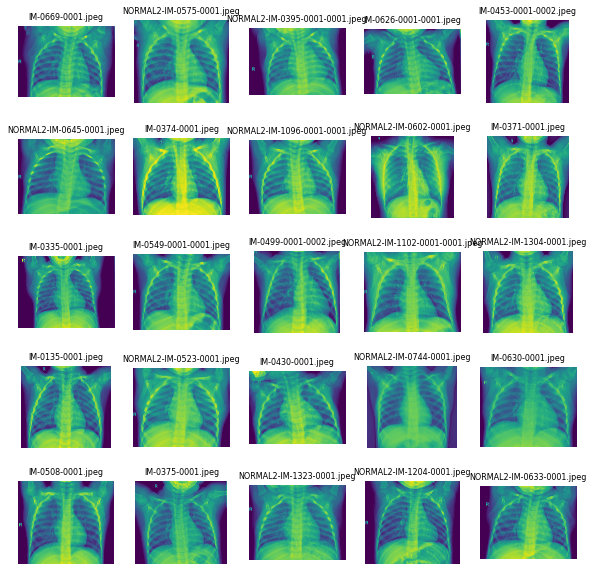

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import random
W_grid = 5
L_grid = 5

fig , axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes = axes.ravel()
#n_training = len(X_train)

for i in np.arange(0,W_grid*L_grid):
  #index = np.random.randint(0,len(cats_fnames))
  index=random.choice(normal_fnames)
  img_path = os.path.join(train_normal_dir,index)
  img = mpimg.imread(img_path)
  #plt.imshow(img)
  axes[i].imshow(img)
  axes[i].set_title(index, fontsize = 8)
 # axes[i].set_title(y_train[index], fontsize = 15)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

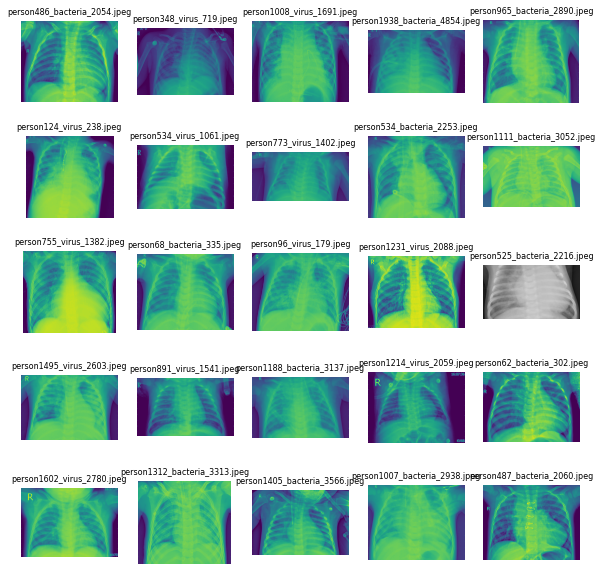

In [13]:
W_grid = 5
L_grid = 5

fig , axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes = axes.ravel()
#n_training = len(X_train)

for i in np.arange(0,W_grid*L_grid):
  #index = np.random.randint(0,len(cats_fnames))
  index=random.choice(pneumonia_fnames)
  img_path = os.path.join(train_pneumonia_dir,index)
  img = mpimg.imread(img_path)
  #plt.imshow(img)
  axes[i].imshow(img)
  axes[i].set_title(index, fontsize = 8)
 # axes[i].set_title(y_train[index], fontsize = 15)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(
    rescale=1./255)

test_datagen = ImageDataGenerator(rescale = 1./255) 
 #Image normalization.
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [65]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.optimizers import Adam 

model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, (5, 5), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5)) # Note the only change is that we added dropout here
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['acc'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 60, 60, 64)        4864      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 26, 26, 128)       204928    
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 9, 9, 256)       

In [55]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 60, 60, 64)        4864      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 26, 26, 128)       204928    
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 21632)           

In [16]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [17]:
train_generator.image_shape

(64, 64, 3)

In [66]:
history = model.fit_generator(train_generator,
                         steps_per_epoch = 100,
                         epochs = 10,
                         validation_data = validation_generator,
                         validation_steps = 100)

Epoch 1/10
100/100 [==============================] - 56s 561ms/step - loss: 0.6014 - acc: 0.7359 - val_loss: 0.7920 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 53s 526ms/step - loss: 0.5254 - acc: 0.7594 - val_loss: 0.6645 - val_acc: 0.6250
Epoch 3/10
100/100 [==============================] - 53s 529ms/step - loss: 0.3642 - acc: 0.8388 - val_loss: 0.9652 - val_acc: 0.5625
Epoch 4/10
100/100 [==============================] - 53s 528ms/step - loss: 0.3110 - acc: 0.8678 - val_loss: 0.4323 - val_acc: 0.8125
Epoch 5/10
100/100 [==============================] - 53s 526ms/step - loss: 0.2180 - acc: 0.9091 - val_loss: 0.3982 - val_acc: 0.8125
Epoch 6/10
100/100 [==============================] - 52s 523ms/step - loss: 0.1994 - acc: 0.9206 - val_loss: 0.4626 - val_acc: 0.8125
Epoch 7/10
100/100 [==============================] - 53s 528ms/step - loss: 0.1735 - acc: 0.9319 - val_loss: 0.3564 - val_acc: 0.8750
Epoch 8/10
100/100 [==============================] - 5

Text(0.5, 0, 'epochs')

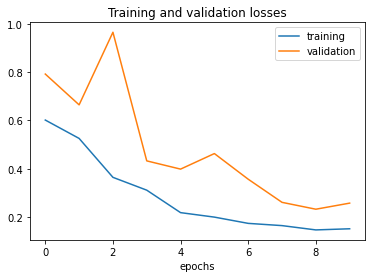

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

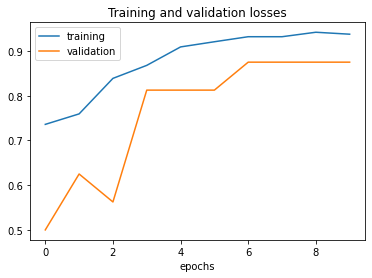

In [68]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

In [69]:
test_accu = model.evaluate_generator(test_generator,steps=80)
print(test_accu)

[0.3300604522228241, 0.8397436141967773]


In [ ]:
print(test_accu[1])

In [70]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

In [71]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img = image.load_img(path , target_size=(64,64))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  print(classes)

Saving person1949_bacteria_4880.jpeg to person1949_bacteria_4880 (1).jpeg
Saving person100_bacteria_481.jpeg to person100_bacteria_481 (1).jpeg
Saving person100_bacteria_478.jpeg to person100_bacteria_478 (1).jpeg
Saving NORMAL2-IM-1436-0001.jpeg to NORMAL2-IM-1436-0001 (1).jpeg
Saving IM-0041-0001.jpeg to IM-0041-0001 (1).jpeg
Saving IM-0011-0001.jpeg to IM-0011-0001 (1).jpeg
Saving IM-0003-0001.jpeg to IM-0003-0001 (1).jpeg
person1949_bacteria_4880.jpeg
[[0.]]
person100_bacteria_481.jpeg
[[1.]]
person100_bacteria_478.jpeg
[[1.]]
NORMAL2-IM-1436-0001.jpeg
[[0.]]
IM-0041-0001.jpeg
[[0.]]
IM-0011-0001.jpeg
[[0.]]
IM-0003-0001.jpeg
[[2.7452304e-22]]
